# The emergence of cooperation in evolutionary systems

Notes for [_An evolutionary advantage of cooperation_](https://arxiv.org/abs/1506.03414) - Peters and Adamou 2018

This paper tackles the apparently paradoxical emergence of cooperation patterns under evolutionary dynamics.  
Why do we observe seemingly _altruistic_ behavior in systems where organisms compete for resources and only the fittest thrive (the so called _survival of the fittest_)?   
Classical solutions propose a net fitness gain from colaboration. The authors seek to explain this gain through the analysis of the time average growth rate for the fitness of the collaborating organisms.

Consider a species in their transition from single cell to multicellular organisms. This change occurs when cells agglomerate and begin sharing nutrients through common membranes, increasing their biomass. Entities with more biomass come to dominate the environment and generate more of themselves.  

The paper proposes the following dynamics for the system:
- entities gain biomass according to an [Itô diffusion](https://en.wikipedia.org/wiki/Itô_diffusion) process, where the change in biomass for entity $x_i$ is:

$$d x_i = x_i(\mu dt + \sigma d \mathit{W_i})$$

where $\mu$ is the drift, $\sigma$ the volatility and $\mathit{W_i}$ is a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process).
- the growth rate over time $T$ is defined as

$$g(x_i, T) \equiv \frac{1}{T} \ln{\Big( \frac{x_i(T)}{x_i(0)} \Big)}$$

## Cooperation protocol

The baseline model consists of $N$ non-cooperating entities $x_i$. This system is compared to one where a  mutation is introduced that hard wires cooperation into the entities. The _cooperators_, hence referred to as $y_i$, pool resources and then share them equally.

The growth phase is the same for all entities in both systems (cooperators and non-cooperators)

$$ \Delta x_i(t) = x_i(t)(\mu \Delta t + \sigma \xi_i \sqrt{\Delta t})$$

where $\xi_i$ are iid variates with $\xi_{i} \sim \mathcal{N}(0,1)$

Then there is a cooperating phase, and the cooperators' biomass at time $t + \Delta t$ is given by

$$ y_{i}(t+\Delta t)=\frac{1}{N} \sum_{j=1}^{N}\left(y_{j}(t)+\Delta y_{j}(t)\right)=y_{i}(t)+\frac{1}{N} \sum_{j=1}^{N} \Delta y_{j}(t) $$



## Analysis of the system

Looked at from the ensemble averaging perspective, given identical initial biomasses $x_i(0) = y_i(0)$ we have

$$\left\langle x_{i}(t)\right\rangle = \left\langle y_{i}(t)\right\rangle = x_{i}(0) \exp (\mu t)$$

Moreover, in a cooperating pair, the entity with higher initial biomass could increase its expectation value by breaking off the cooperation.  

The answer to the paradox comes when the system is looked at through the time-averaging perspective. The authors show that non-cooperators grow at 

$$\overline{g}\left(x_{i}\right)=\mu-\sigma^{2} / 2$$

whereas cooperators grow at

$$\overline{g}\left(y^{(N)}\right)=\mu-\frac{\sigma^{2}}{2 N}$$

where

\begin{equation}
\overline{g}\left(y^{(N)}\right)-\overline{g}\left(x_{i}\right)=\frac{\sigma^{2}}{2}\left(1-\frac{1}{N}\right) \\
\overline{g}\left(y^{(N)}\right) > \overline{g}\left(x_{i}\right) ,\, N > 1
\end{equation}

## Plots

In [1]:
%config InlineBackend.figure_format="retina"

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

plt.style.use("seaborn-whitegrid")

In [2]:
plt.rcParams["figure.figsize"] = (14, 8)
np.random.seed(5)

The chart from the paper showing the expectation value, growth rate for non colaborating and for $N = 2$ colaborating entities.

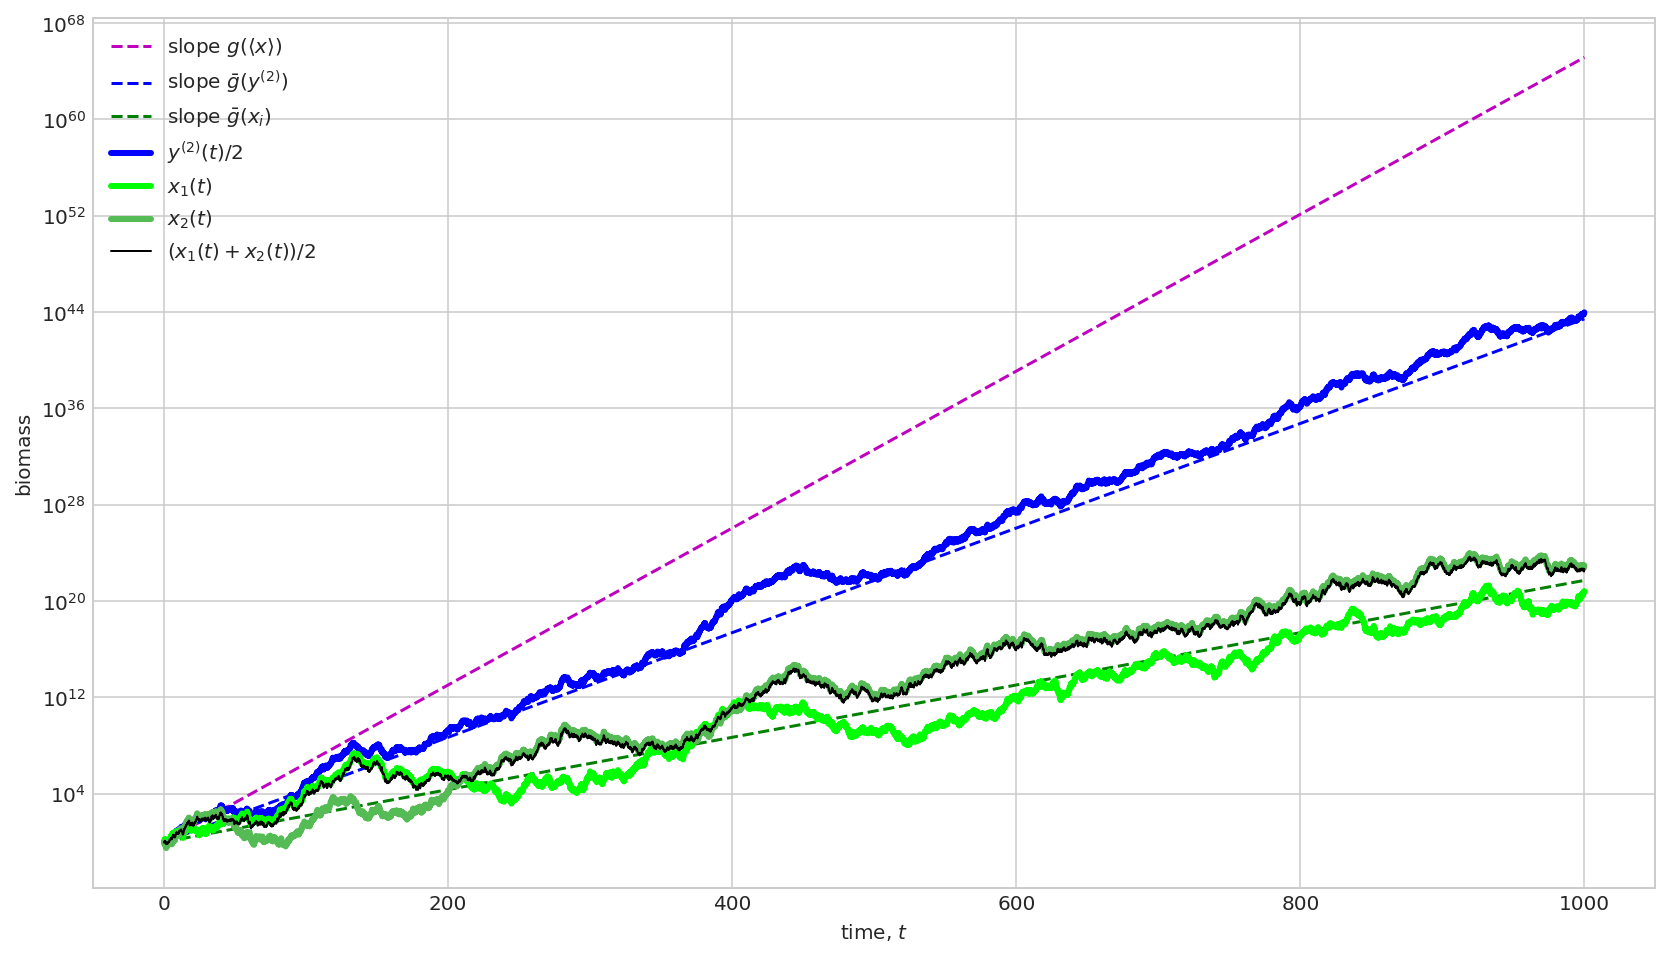

In [3]:
# Taken from https://www.researchers.one/media/documents/194-s-cooperate.py
#
# Created 07 May 2019
# Code to generate Fig.2 of Peters and Adamou 
# "An evolutionary advantage of cooperation"
# @author: Ole Peters

mu=.15
sigma=np.sqrt(.2)
T = 10000
dt=.1
t=np.arange(0,(T+1)*dt,dt)
sdt=np.sqrt(dt)

#expectation value and time-average slopes
expectation=np.exp(mu*t)
t_growth_individual=np.exp((mu-sigma*sigma/2)*t)
t_growth_coop=np.exp((mu-sigma*sigma/4)*t)

#Generate wealth of individual 1
noise_1=np.random.normal(loc=1+mu*dt, scale=sigma*sdt, size=T)
wealth_1=np.cumprod(noise_1)
wealth_1=np.insert(wealth_1,0,1)

#Generate wealth of individual 2
noise_2=np.random.normal(loc=1+mu*dt, scale=sigma*sdt, size=T)
wealth_2=np.cumprod(noise_2)
wealth_2=np.insert(wealth_2,0,1)

#Generate average wealth of individuals
wealth_ave=(wealth_1+wealth_2)/2

#Generate wealth of cooperating individuals
noise_co=(noise_1+noise_2)/2
wealth_co=np.cumprod(noise_co)
wealth_co=np.insert(wealth_co,0,1)

#Plotting...
plt.plot(t,expectation,'m--',label=r'slope $g(\langle x \rangle)$')
plt.plot(t,t_growth_coop,'b--', label=r'slope $\bar{g}(y^{(2)})$')
plt.plot(t,t_growth_individual,'g--', label=r'slope $\bar{g}(x_i)$')

plt.plot(t,wealth_co,'b-',linewidth=3, label=r'$y^{(2)}(t)/2$')
plt.plot(t,wealth_1,color='#00ff00',linewidth=3, label=r'$x_1(t)$')
plt.plot(t,wealth_2,color='#55bb55',linewidth=3, label=r'$x_2(t)$')
plt.plot(t,wealth_ave,'k-',linewidth=1, label=r'$(x_1(t)+x_2(t))/2$')

plt.yscale('log')
plt.legend()
plt.xlabel('time, $t$')
plt.ylabel('biomass')
plt.show()

As the authors point out:

> In a very literal mathematical sense the whole, $y_1(t)+y_2(t)$, is more than the sum of its parts, $x_1(t) + x_2(t)$. The algebra of cooperation is not merely that of summation.

Next we'll visualize how the total biomass grows for systems of cooperating vs non-cooperating entities with populations $N \in \{2, 3, 4, 5\}$.  

For this, we'll build generators that produce an array of biomasses for each time step.

In [7]:
mu = 0.15
sigma = np.sqrt(0.2)
dt = 1
sdt = np.sqrt(dt)

initial_biomass = 10 # All entities start with equal biomass 

def increase_biomass(initial_biomasses):
    """Yield biomasses of non-cooperating and cooperating entities for each time step"""
    non_coop_masses = coop_masses = initial_biomasses
    N = len(initial_biomasses)
    while True:
        yield non_coop_masses, coop_masses
        xi = np.random.normal(size=N)       
        non_coop_masses = non_coop_masses + non_coop_masses * (mu * dt + sigma * xi * sdt)
        delta_y = np.sum(coop_masses * (mu * dt + sigma * xi * sdt)) / N
        coop_masses += delta_y

In [12]:
%%capture

fig, axes = plt.subplots(2, 2)

title = fig.suptitle("Time", fontsize=22)

x_marks = [1, 2]
labels = [r"$x(t)$", r"$y(t)$"]

barplots = []
for i in range(2):
    for j in range(2):
        axes[i, j].set_title("N = {}".format((2 << i) + j))
        axes[i, j].set_xlim([0, 3])
        axes[i, j].set_ylim([1, 1E12])
        axes[i, j].set_yscale("log")
        axes[i, j].set_ylabel("Total biomass")
        axes[i, j].set_xticks(x_marks)
        axes[i, j].set_xticklabels(labels)
        bars = axes[i, j].bar(x_marks, [initial_biomass, initial_biomass], color=("#00876c", "#d43d51"))
        barplots.append(bars)

biomasses = {}
for N in [2, 3, 4, 5]:
    initial_biomasses = np.full(N, initial_biomass, dtype=np.float)
    biomasses[N] = increase_biomass(initial_biomasses)

def animate(t):
    for N, bars in zip([2, 3, 4, 5], barplots):
        bar_non_coop, bar_coop = bars
        biomasses_non_coop, biomasses_coop = next(biomasses[N])
            
        bar_non_coop.set_height(np.sum(biomasses_non_coop))
        bar_coop.set_height(np.sum(biomasses_coop))

    title.set_text("Time = {}".format(t))
    
anim = animation.FuncAnimation(fig, animate,
                               frames=300, interval=50)

In [13]:
# In order to save the animation uncomment the line below
# anim.save("biomass-growth.mp4",writer=animation.FFMpegWriter(fps=15))

HTML(anim.to_jshtml(default_mode="once"))